In [ ]:
# Check if is running in Colab and redefine is_interactive()
if (file.exists("/usr/local/lib/python3.6/dist-packages/google/colab/_ipython.py")) {
  install.packages("R.utils")
  library(R.utils)
  library(httr)
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check)
  options(rlang_interactive=TRUE) 
}

In [ ]:
# If ts not available we need to install . put other packages if you need.
packages <- c("googledrive", "googlesheets4")
if (length(setdiff(packages, rownames(installed.packages()))) > 0) {
  install.packages(setdiff(packages, rownames(installed.packages())))  
} 

In [ ]:
library(googledrive)
library(googlesheets4)


Attaching package: ‘googlesheets4’


The following objects are masked from ‘package:googledrive’:

    request_generate, request_make




# **Importing the libraries**

In [ ]:
install.packages("factoextra")
install.packages("ggplot")
install.packages("corrplot")
install.packages("caret")
install.packages('caTools')
install.packages("class")
install.packages('MLmetrics')
install.packages('randomForest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘xtable’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘Rcpp’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘ggplot’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is

In [ ]:
library(readr) 
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) # clustering visualization
library(dendextend) # for comparing two dendrograms
library(ggplot2)
library(caret)
library(corrplot)
library(caTools)
library(caret)
library(class)
library(randomForest)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


---------------------
Welcome to dendextend version 1.16.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:stats’:

    cutree


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


corrplot 0.92 loaded

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.

# **Exploratory Data Analysis**

In [ ]:
Data = read.csv("heart.csv")

In [ ]:
#Displaying the first few rows in the data 
head(Data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
6,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


In [ ]:
#Number Rows and Columns in the dataset
ncol(Data)
nrow(Data)

[1] 14

[1] 1025

In [ ]:
#Checking for missing values(NA) in the data
sum(is.na(Data))

[1] 0

There are no missing values in the data

In [ ]:
#Different columns in the dataset
colnames(Data)

[1] "age"      "sex"      "cp"       "trestbps" "chol"     "fbs"     
 [7] "restecg"  "thalach"  "exang"    "oldpeak"  "slope"    "ca"      
[13] "thal"     "target"

In [ ]:
#Count of number of patients have the disease
Data %>% count(target)

target,n
<int>,<int>
0,499
1,526


There are 499 patients do not have heart disease and 526 have heart disease

In [ ]:
#The proportion of patients with chest pain types
Data %>% group_by(cp) %>% 
  summarise( percent = 100 * n() / nrow( Data ))

cp,percent
<int>,<dbl>
0,48.487805
1,16.292683
2,27.707317
3,7.512195


There are 48% of patient with typical angina chest pain, 16% ofpatients with atypical angina, 27% with non-angina pain, and 7% with asympotomatic chest pain

In [ ]:
#Proportion of males and females patients in the dataset
Data %>% 
    group_by( sex ) %>% 
    summarise( percent = 100 * n() / nrow( Data ))

sex,percent
<int>,<dbl>
0,30.43902
1,69.56098


There are 30% femlaes and 70% males in the  dataset

In [ ]:
#Percentage of males and females with heart disease
Sub_female <- table(Data[Data$sex==0,]$target)
Sub_male <- table(Data[Data$sex==1,]$target)
FM_combine <- rbind(Sub_female,Sub_male)

#Rename columns names and rows names.
colnames(FM_combine) <- c("Has heart disease", "Does not have heart disease")
rownames(FM_combine) <- c("Females", "Males")

#Display the table
FM_combine

,Has heart disease,Does not have heart disease
Females,86,226
Males,413,300


There are 86 females out of 312 who have diagnosed with heart disease and 413 males out of 713 werediagnosed with hearrt disease.

This indicates that 58% of males in this dataset are diagnosed with heart disease where is only 28% of females are dignosed with heart disease.

Males are more diagnosed with heart disease than females

In [ ]:
#Summary of the data
summary(Data)

      age             sex               cp            trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :0.0000   Min.   : 94.0  
 1st Qu.:48.00   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:120.0  
 Median :56.00   Median :1.0000   Median :1.0000   Median :130.0  
 Mean   :54.43   Mean   :0.6956   Mean   :0.9424   Mean   :131.6  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.0000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.0000   Max.   :200.0  
      chol          fbs            restecg          thalach     
 Min.   :126   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:132.0  
 Median :240   Median :0.0000   Median :1.0000   Median :152.0  
 Mean   :246   Mean   :0.1493   Mean   :0.5298   Mean   :149.1  
 3rd Qu.:275   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:166.0  
 Max.   :564   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak          slope             ca        
 Min.   :

The describe  function displays important inormation about the each feature such as the minimum value, maximum value,standard deviation, number of observations mean and median nd other useful information.

In [ ]:
describe(Data)

ERROR: ignored

# **Data Visualization**

In [ ]:

#Mapping data into respective meanings
Data2 <- Data %>%
  mutate(sex = if_else(sex == 1, "MALE", "FEMALE"),
         fbs = if_else(fbs == 1, ">120", "<=120"),
         exang = if_else(exang == 1, "YES" ,"NO"),
         cp = if_else(cp == 1, "ATYPICAL ANGINA",
                      if_else(cp == 2, "NON-ANGINAL PAIN", "ASYMPTOMATIC")),
         restecg = if_else(restecg == 0, "NORMAL",
                           if_else(restecg == 1, "ABNORMALITY", "PROBABLE OR DEFINITE")),
         slope = as.factor(slope),
         ca = as.factor(ca),
         thal = as.factor(thal),
         target = if_else(target == 1, "YES", "NO")
  ) %>% 
  mutate_if(is.character, as.factor) %>% 
  dplyr::select(target, sex, fbs, exang, cp, restecg, slope, ca, thal, everything())

Warning message:
“Use of `Data2$target` is discouraged. Use `target` instead.”
Warning message:
“Use of `Data2$target` is discouraged. Use `target` instead.”



       NO       YES 
0.4868293 0.5131707 

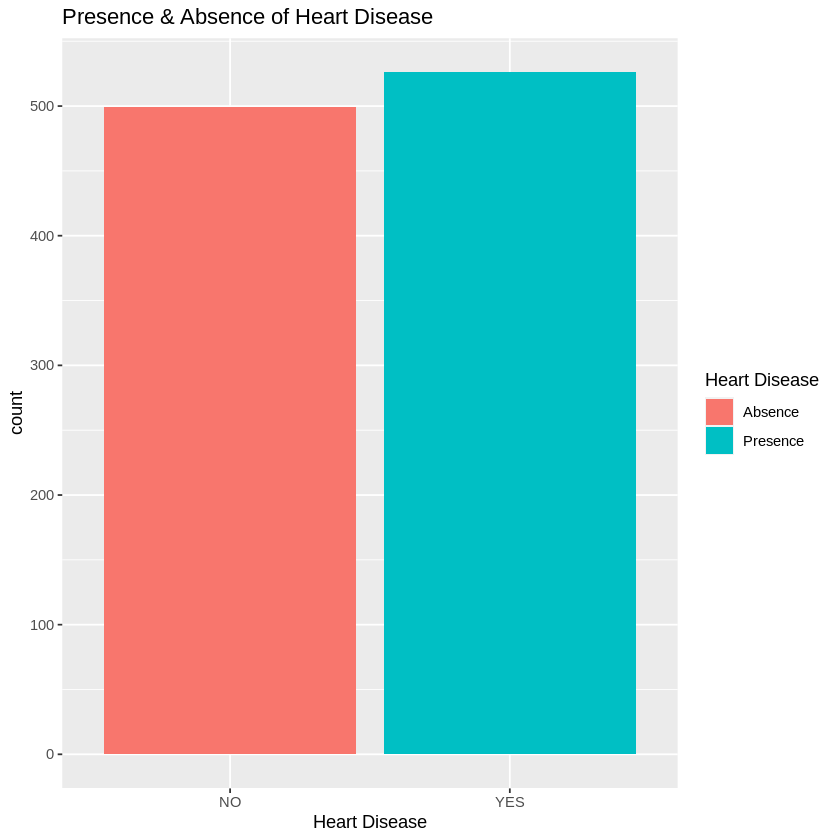

In [ ]:
# Bar Plot for target (heart disease)
# install.packages("ggplot")
library(ggplot2)
ggplot( Data2, aes(x=  Data2$target, fill= Data2$target))+
  geom_bar()+
  xlab("Heart Disease")+
  ylab("count")+
  ggtitle("Presence & Absence of Heart Disease")+
  scale_fill_discrete(name= 'Heart Disease', labels =c("Absence", "Presence"))

prop.table(table( Data2$target))

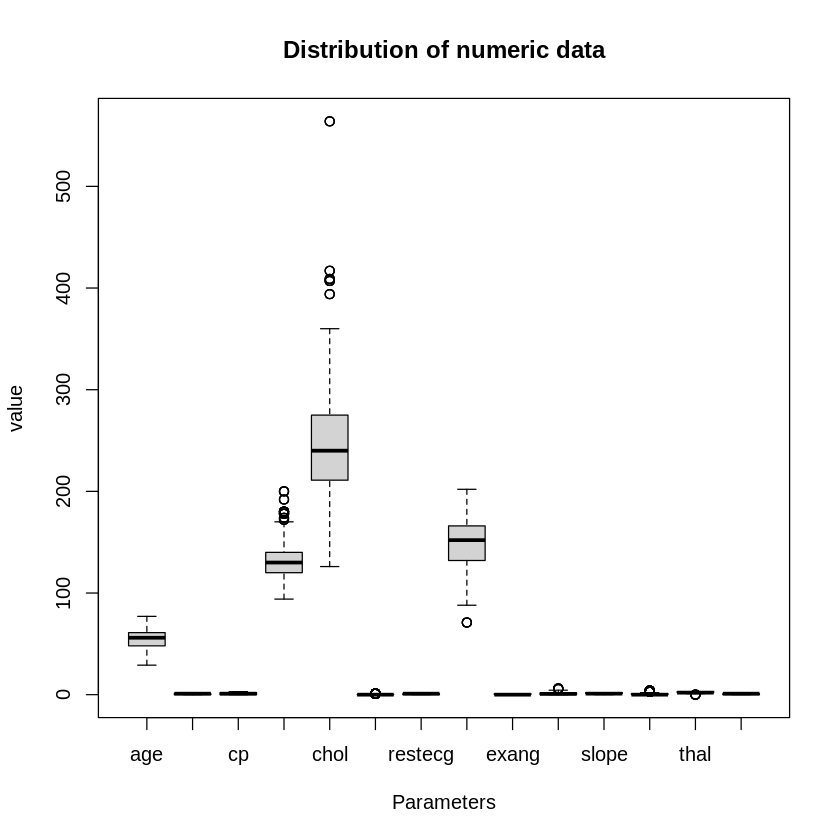

In [ ]:
#Outliers
outliers <- boxplot(Data %>% select_if(is.numeric), 
main = 'Distribution of numeric data', xlab = 'Parameters', ylab = 'value')

In [ ]:
data3 <- Data %>% select_if(is.numeric)
dim(data3)
## [1] 150   4
 
quartiles <- quantile(data3$chol, probs=c(.25, .75), na.rm = FALSE)
IQR <- IQR(data3$chol)
 
Lower <- quartiles[1] - 1.5*IQR
Upper <- quartiles[2] + 1.5*IQR 
 
data3 <- subset(data3, data3$chol > Lower & data3$chol < Upper)
 
dim(data3)

[1] 1025   14

[1] 1009   14

In [ ]:
dim(data3)
## [1] 150   4
 
quartiles <- quantile(data3$trestbps, probs=c(.25, .75), na.rm = FALSE)
IQR <- IQR(data3$trestbps)
 
Lower <- quartiles[1] - 1.5*IQR
Upper <- quartiles[2] + 1.5*IQR 
 
data3 <- subset(data3, data3$trestbps > Lower & data3$trestbps < Upper)
 
dim(data3)

[1] 1009   14

[1] 964  14

In [ ]:

dim(data3)
## [1] 150   4
 
quartiles <- quantile(data3$thalach, probs=c(.25, .75), na.rm = FALSE)
IQR <- IQR(data3$thalach)
 
Lower <- quartiles[1] - 1.5*IQR
Upper <- quartiles[2] + 1.5*IQR 
 
data3 <- subset(data3, data3$thalach > Lower & data3$thalach < Upper)
 
dim(data3)

[1] 964  14

[1] 960  14

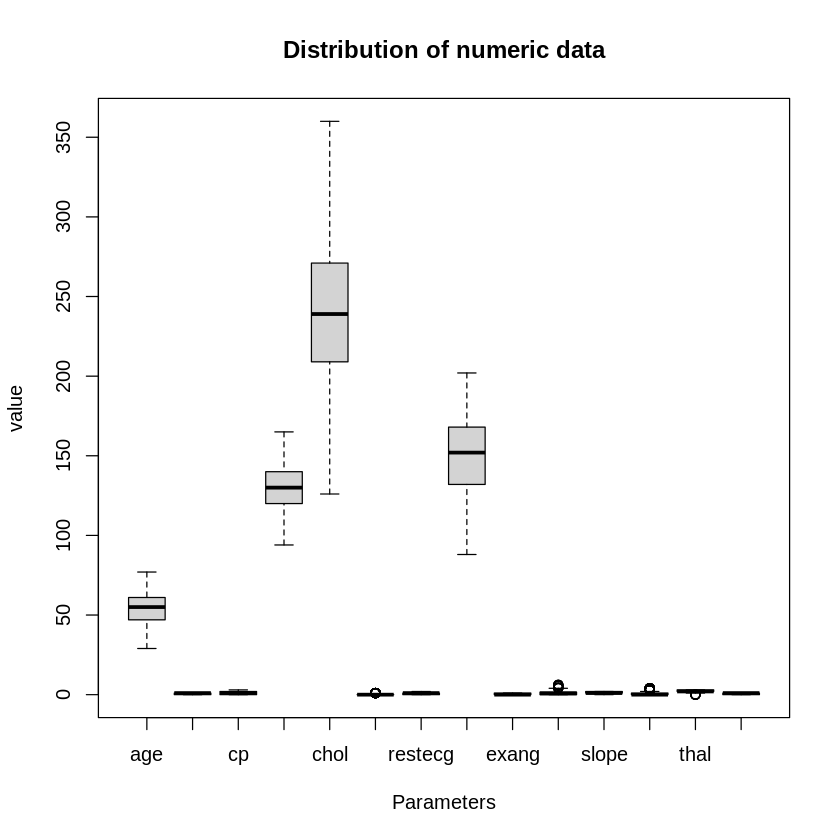

In [ ]:
outliers <- boxplot(data3, 
main = 'Distribution of numeric data', xlab = 'Parameters', ylab = 'value')

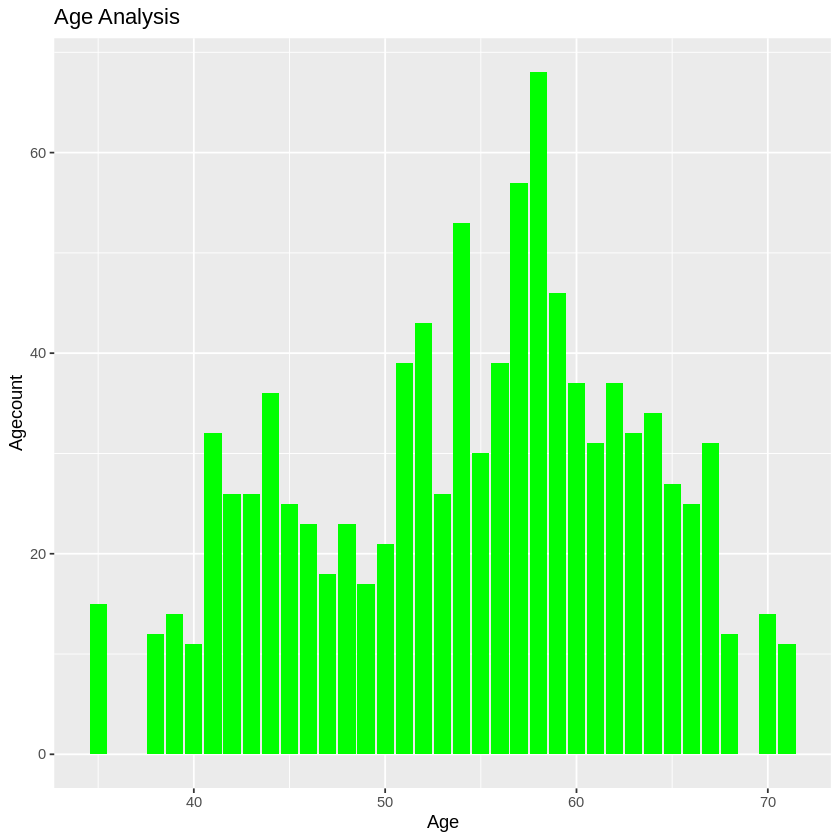

In [ ]:
# count the frequency of the values of age

Data2 %>%
  group_by(age) %>%
  count() %>%
  filter(n>10) %>%
  ggplot()+
  geom_col(aes(age, n), fill = 'green')+
  ggtitle("Age Analysis")+
  xlab("Age")+
  ylab("Agecount")

Warning message in `[<-.factor`(`*tmp*`, Data2$target > 0, value = 1):
“invalid factor level, NA generated”
Warning message in Ops.factor(Data2$target, 0):
“‘>’ not meaningful for factors”


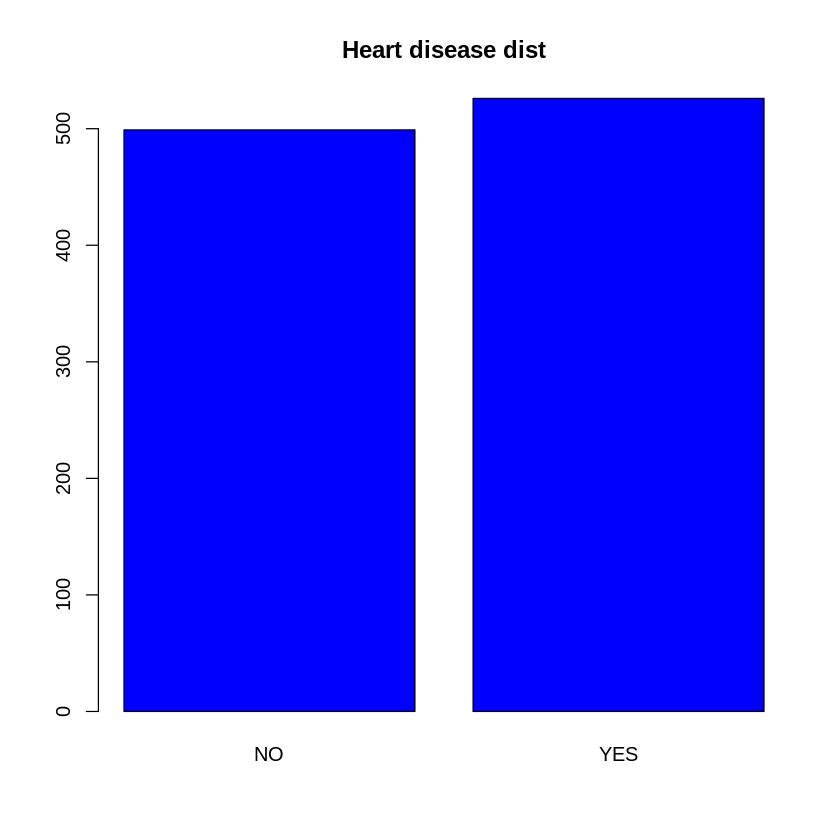

In [ ]:
#Distribution of Heart Disease Diagnosis
Data2$target[Data2$target > 0] <- 1
barplot(table(Data2$target),
        main="Heart disease dist", col="blue")

Plot to visualize the heart disease distriuions by chest pain on gender, There are four types of chest pain 
* 0 - typical angina
* 1 - atypicalangina
* 2 - non-angina pain
* 3 - asymtomatic 

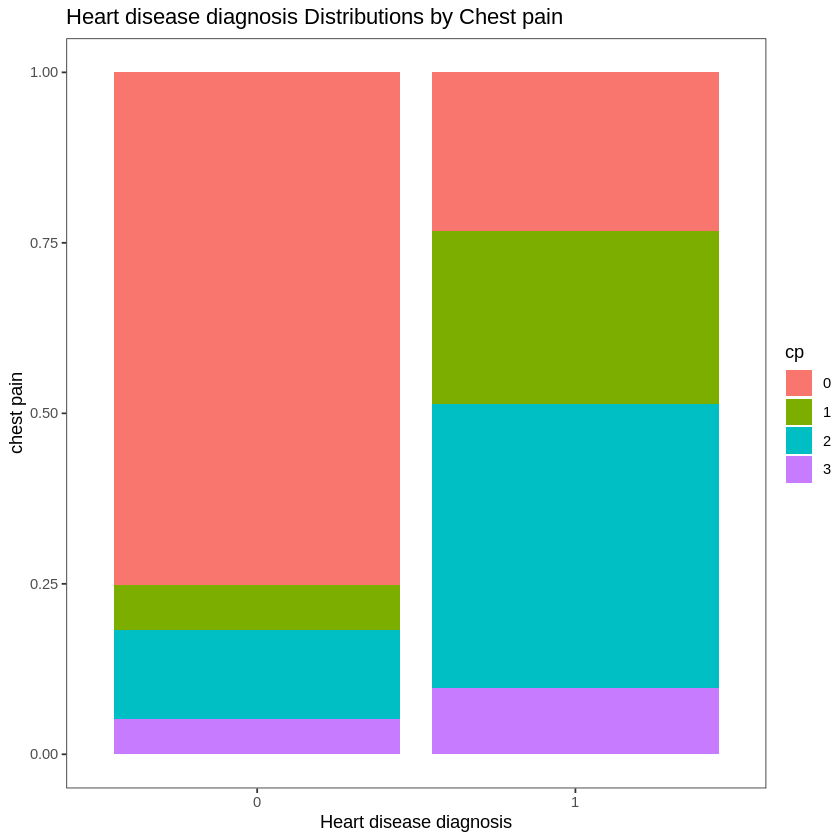

In [ ]:
#Heart Disease Diagnosis Distribution by Chest pain
# 0 - typical angina
# 1 - atypicalangina
# 2 - non-angina pain
# 3 - asymtomatic 
Data$sex <- as.factor(Data$sex)
Data$target <- as.factor(Data$target)
Data$cp <- as.factor(Data$cp)

ggplot(data = Data, aes(x = target, fill = cp)) + 
  geom_bar(position = "fill") +
  labs(title = "Heart disease diagnosis Distributions by Chest pain",
       x = "Heart disease diagnosis",
       y = "chest pain") +
  theme_test()

Heart disease diagnosis frequency by resting electrocardiographic results and sex

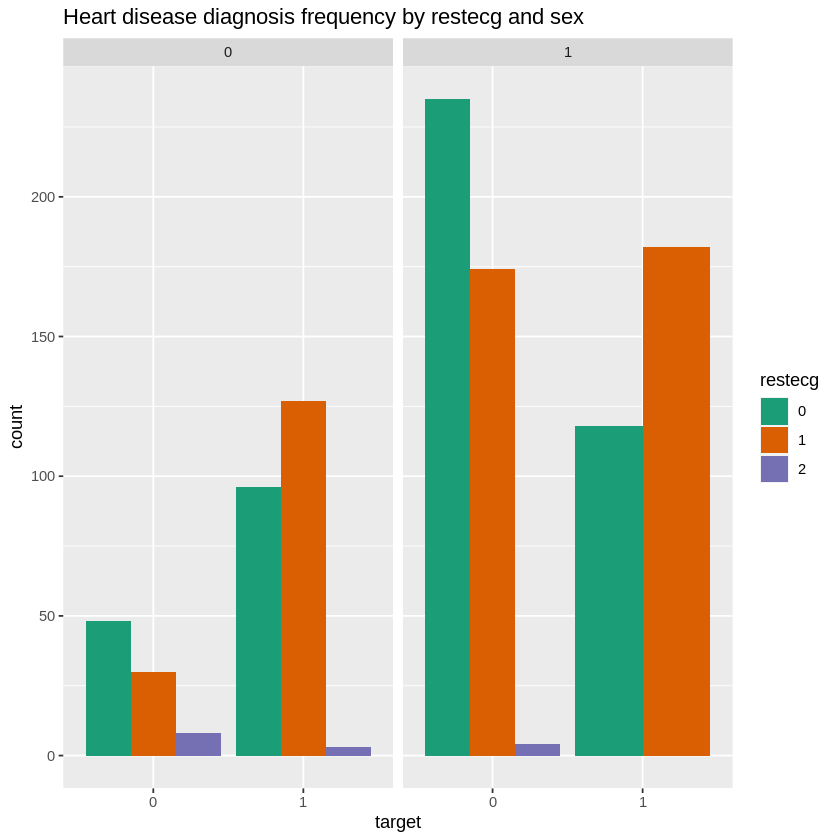

In [ ]:
#Heart disease diagnosis frequency by resting elextrocardiograaphic results and sex
# restecg:
# 0 - normal
# 1 - having ST-T wave abnormality
# 2 - showing probable left ventricular hypertrophy
Data$restecg <- as.factor(Data$restecg)
Data %>%
  ggplot(aes(x = target, fill=restecg)) + 
  geom_bar(position = "dodge") +
  facet_grid(~sex) +
  scale_fill_brewer(palette = "Dark2") +
  labs(title="Heart disease diagnosis frequency by restecg and sex")

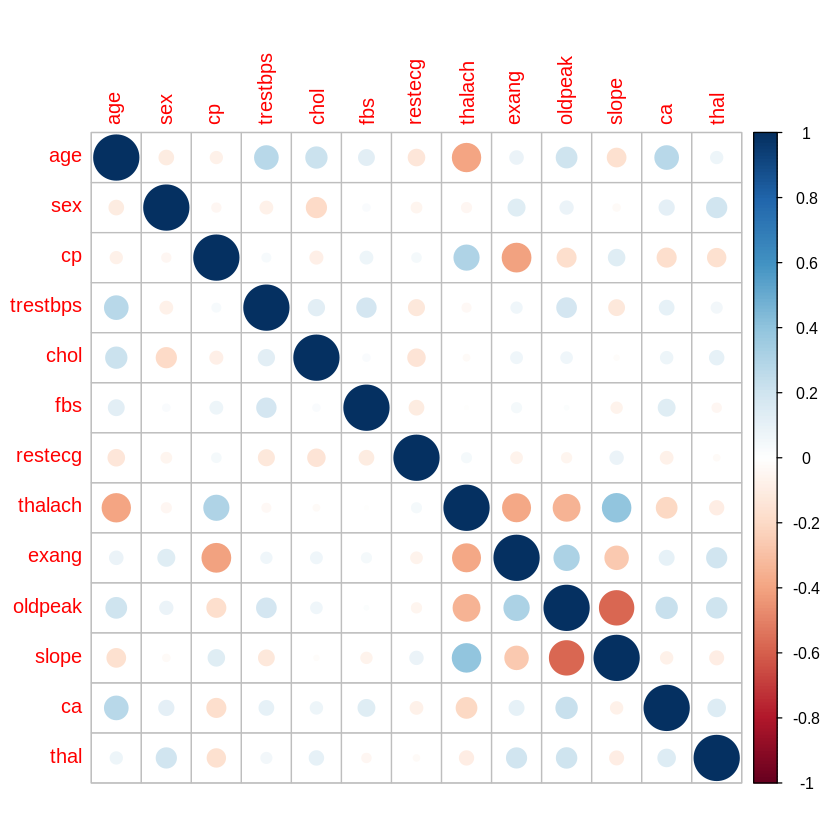

In [ ]:
#Correlation 
Data$age <- as.numeric(Data$age)
Data$sex <- as.numeric(Data$sex)
Data$cp <- as.numeric(Data$cp)
Data$trestbps <- as.numeric(Data$trestbps)
Data$chol <- as.numeric(Data$chol)
Data$fbs <- as.numeric(Data$fbs)
Data$restecg <- as.numeric(Data$restecg)
Data$thalach <- as.numeric(Data$thalach)
Data$exang <- as.numeric(Data$exang)
Data$oldpeak <- as.numeric(Data$oldpeak)
Data$slope <- as.numeric(Data$slope)
Data$ca <- as.numeric(Data$ca)
Data$thal <- as.numeric(Data$thal)

correlations <- cor(Data[,1:13])
corrplot(correlations, method="circle")

In [ ]:
CHI_cp <- chisq.test(Data$cp, Data$target) 
CHI_age <- chisq.test(Data$age, Data$target)
CHI_trestbps <- chisq.test(Data$trestbps, Data$target)
CHI_chol <- chisq.test(Data$chol, Data$target)
CHI_fbs <- chisq.test(Data$fbs, Data$target)
CHI_restecg <- chisq.test(Data$restecg, Data$target)

# Print the results to see if p<0.05.
print(CHI_cp)
print(CHI_age)
print(CHI_trestbps)
print(CHI_chol)
print(CHI_fbs)
print(CHI_restecg)

Warning message in chisq.test(Data$age, Data$target):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(Data$trestbps, Data$target):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(Data$chol, Data$target):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  Data$cp and Data$target
X-squared = 280.98, df = 3, p-value < 2.2e-16


	Pearson's Chi-squared test

data:  Data$age and Data$target
X-squared = 178.77, df = 40, p-value < 2.2e-16


	Pearson's Chi-squared test

data:  Data$trestbps and Data$target
X-squared = 156.77, df = 48, p-value = 1.824e-13


	Pearson's Chi-squared test

data:  Data$chol and Data$target
X-squared = 597.14, df = 151, p-value < 2.2e-16


	Pearson's Chi-squared test with Yates' continuity correction

data:  Data$fbs and Data$target
X-squared = 1.5134, df = 1, p-value = 0.2186


	Pearson's Chi-squared test

data:  Data$restecg and Data$target
X-squared = 35.784, df = 2, p-value = 1.696e-08



# **Feature Selection**

In [ ]:
set.seed(123)
split=sample.split(Data$target, SplitRatio = 0.8)
Train_Data=subset(Data,split == TRUE)
Test_Data=subset(Data,split == FALSE)
Train_y = Train_Data$target

# **KNN**

In [ ]:
k <- round(sqrt(nrow(Train_Data)))
k

[1] 29

In [ ]:
k <- round(k/4)
k

[1] 7

In [ ]:
model_knn = knn(train = Train_Data, test = Test_Data, cl = Train_y, k=k)

In [ ]:
cm_knn_model = confusionMatrix(as.factor(model_knn), Test_Data$target)
cm_knn_model

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 79 28
         1 21 77
                                          
               Accuracy : 0.761           
                 95% CI : (0.6966, 0.8176)
    No Information Rate : 0.5122          
    P-Value [Acc > NIR] : 2.201e-13       
                                          
                  Kappa : 0.5225          
                                          
 Mcnemar's Test P-Value : 0.3914          
                                          
            Sensitivity : 0.7900          
            Specificity : 0.7333          
         Pos Pred Value : 0.7383          
         Neg Pred Value : 0.7857          
             Prevalence : 0.4878          
         Detection Rate : 0.3854          
   Detection Prevalence : 0.5220          
      Balanced Accuracy : 0.7617          
                                          
       'Positive' Class : 0               
                                    

# **Logistic Regression**

### **Maxima Function**

In [ ]:
#Maximal Model
model.all <- glm(target ~ . ,  Data, family = 'binomial')
summary(model.all)


Call:
glm(formula = target ~ ., family = "binomial", data = Data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5154  -0.4018   0.1192   0.5949   2.6920  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.268955   1.522735   2.803  0.00506 ** 
age         -0.008199   0.012609  -0.650  0.51551    
sex         -1.846549   0.256572  -7.197 6.16e-13 ***
cp           0.854601   0.100353   8.516  < 2e-16 ***
trestbps    -0.018239   0.005621  -3.245  0.00118 ** 
chol        -0.005670   0.002056  -2.757  0.00583 ** 
fbs         -0.101152   0.284855  -0.355  0.72251    
restecg      0.413237   0.188984   2.187  0.02877 *  
thalach      0.023626   0.005682   4.158 3.21e-05 ***
exang       -0.990787   0.224287  -4.418 9.98e-06 ***
oldpeak     -0.570731   0.116004  -4.920 8.66e-07 ***
slope        0.534070   0.188677   2.831  0.00465 ** 
ca          -0.754488   0.103052  -7.321 2.45e-13 ***
thal        -0.886068   0.155629  -5.693 1.24e-0

In [ ]:
# Prediciting using `model.all`
result.all <- predict(model.all, Test_Data)

# Changing prediction values into classes
threshold <- 0.5
pred.all <- as.factor(ifelse(result.all > threshold, 1, 0))

# Making confusion matrix
cm.all <- confusionMatrix(pred.all, Test_Data$target, positive ='1')
cm.all

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 89 14
         1 11 91
                                          
               Accuracy : 0.878           
                 95% CI : (0.8253, 0.9195)
    No Information Rate : 0.5122          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7561          
                                          
 Mcnemar's Test P-Value : 0.6892          
                                          
            Sensitivity : 0.8667          
            Specificity : 0.8900          
         Pos Pred Value : 0.8922          
         Neg Pred Value : 0.8641          
             Prevalence : 0.5122          
         Detection Rate : 0.4439          
   Detection Prevalence : 0.4976          
      Balanced Accuracy : 0.8783          
                                          
       'Positive' Class : 1               
                                    

### **Step-wise Function**

Features for the ogistic regression is selected using the tepwise regression. The direction of features selection is backwards, which means features are selected from the available features.

Out of  all the 12 features only 8 features were selected .

In [ ]:
#Stepwise
model.step <- step(model.all, scope = y ~ ., direction = 'backward', trace = 0)
variables <- attr(model.step$terms, 'term.labels')
summary(model.step)


Call:
glm(formula = target ~ sex + cp + trestbps + chol + restecg + 
    thalach + exang + oldpeak + slope + ca + thal, family = "binomial", 
    data = Data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4974  -0.3877   0.1202   0.5907   2.6892  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.741329   1.272701   2.940 0.003286 ** 
sex         -1.833969   0.254163  -7.216 5.37e-13 ***
cp           0.845741   0.098436   8.592  < 2e-16 ***
trestbps    -0.019334   0.005442  -3.553 0.000381 ***
chol        -0.005943   0.002030  -2.928 0.003415 ** 
restecg      0.428397   0.188103   2.277 0.022759 *  
thalach      0.025058   0.005212   4.808 1.53e-06 ***
exang       -0.990409   0.223000  -4.441 8.94e-06 ***
oldpeak     -0.564467   0.115350  -4.894 9.90e-07 ***
slope        0.541397   0.187633   2.885 0.003909 ** 
ca          -0.765887   0.101506  -7.545 4.51e-14 ***
thal        -0.876761   0.152491  -5.750 8.95e-09 ***
---
Signi

In [ ]:
# Prediciting using `model.step`
result.step <- predict(model.step, Test_Data)

# Changing prediction values into classes
threshold <- 0.5
pred.step <- as.factor(ifelse(result.step > threshold, 1, 0))

# Making confusion matrix
cm.step <- confusionMatrix(pred.step, Test_Data$target, positive ='1')
cm.step

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 89 16
         1 11 89
                                          
               Accuracy : 0.8683          
                 95% CI : (0.8142, 0.9114)
    No Information Rate : 0.5122          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7367          
                                          
 Mcnemar's Test P-Value : 0.4414          
                                          
            Sensitivity : 0.8476          
            Specificity : 0.8900          
         Pos Pred Value : 0.8900          
         Neg Pred Value : 0.8476          
             Prevalence : 0.5122          
         Detection Rate : 0.4341          
   Detection Prevalence : 0.4878          
      Balanced Accuracy : 0.8688          
                                          
       'Positive' Class : 1               
                                    

# **K-Means**

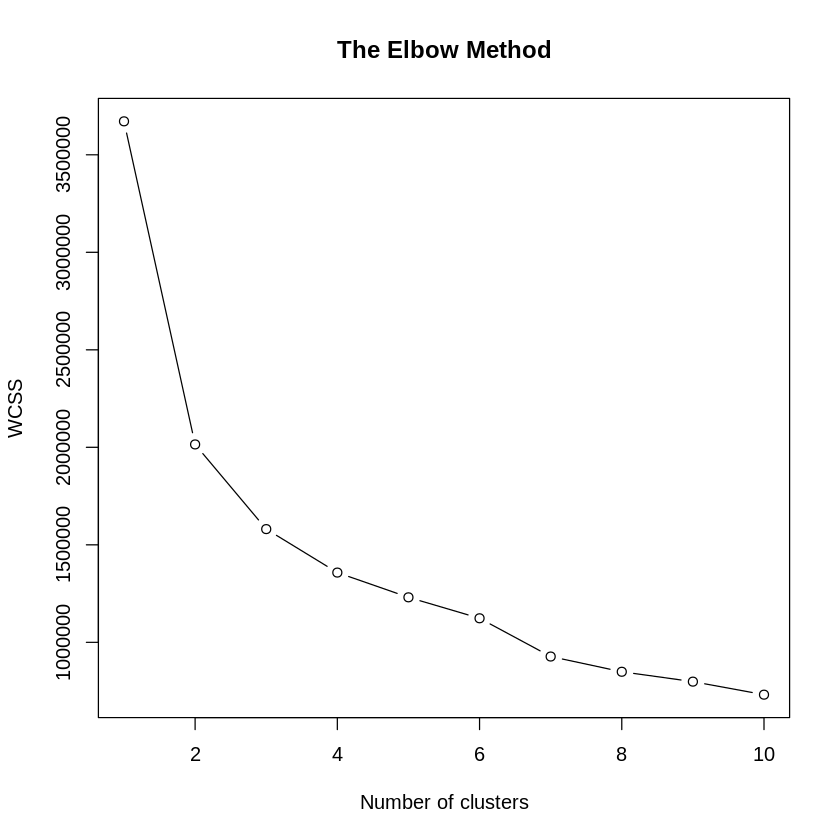

In [ ]:
set.seed(6)
wcss = vector()
for (i in 1:10) wcss[i] = sum(kmeans(Data, i)$withinss)
plot(1:10,
     wcss,
     type = 'b',
     main = paste('The Elbow Method'),
     xlab = 'Number of clusters',
     ylab = 'WCSS')

In [ ]:
# Fitting K-Means to the dataset
set.seed(29)
kmeans = kmeans(x = Data, centers = 2)
y_kmeans = kmeans$cluster

In [ ]:
#Value of cluster center datapoint value(2 center for center = 2)
kmeans$centers

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,56.65829,1.613065,1.819095,134.6055,296.1608,0.1532663,1.414573,145.3191,0.4020101,1.177387,1.364322,0.8743719,2.414573,0.4195980
2,53.02233,1.748006,2.020734,129.7113,214.1595,0.1467305,1.602871,151.5231,0.2950558,1.004306,1.398724,0.6778309,2.266348,0.5725678


In [ ]:
table(kmeans$cluster, Data2$target)

   
     NO YES
  1 231 167
  2 268 359


*   **Total number of correctly classified instances are 231 + 359 = 590**
*   **Total number o incorrectly classifies instances are 167 + 268 = 435**
*   **Accuracy = 590/(590 + 435) = 0.5756 = 57.56%**

In [ ]:
#AGGLOMERATIVE HIERARCHICAL CLUSTERING 
# Dissimilarity matrix
d <- dist(Data, method = "euclidean")

In [ ]:
# Ward's method
hc5 <- hclust(d, method = "ward.D2" )
# Cut tree into 4 groups
sub_grp <- cutree(hc5, k = 2)
table(sub_grp)

sub_grp
  1   2 
542 483 

In [ ]:
#AGGLOMERATIVE HIERARCHICAL CLUSTERING 
# Dissimilarity matrix
d <- dist(Data, method = "euclidean")

In [ ]:
# Ward's method
hc5 <- hclust(d, method = "ward.D2" )
# Cut tree into 4 groups
sub_grp <- cutree(hc5, k = 2)
# Number of members in each cluster
table(sub_grp)


sub_grp
  1   2 
542 483 

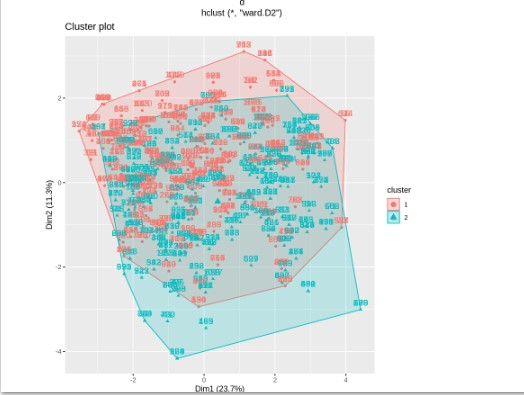

# **Random Forest**

In [ ]:
set.seed(123)
split=sample.split(Data$target, SplitRatio = 0.8)
Train_Data=subset(Data,split == TRUE)
Test_Data=subset(Data,split == FALSE)
Train_y = Train_Data$target

In [ ]:
library(randomForest)
set.seed(100)
RFModel1 <- randomForest(target ~ ., Train_Data, importance=TRUE, ntree=50)
RFModel1


Call:
 randomForest(formula = target ~ ., data = Train_Data, importance = TRUE,      ntree = 50) 
               Type of random forest: classification
                     Number of trees: 50
No. of variables tried at each split: 3

        OOB estimate of  error rate: 0.37%
Confusion matrix:
    0   1 class.error
0 398   1 0.002506266
1   2 419 0.004750594

In [ ]:
RFPrediction1 <- predict(RFModel1, Test_Data)
RFCofMat1 = confusionMatrix(RFPrediction1, Test_Data[,"target"])
RFCofMat1

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 100   0
         1   0 105
                                     
               Accuracy : 1          
                 95% CI : (0.9822, 1)
    No Information Rate : 0.5122     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.4878     
         Detection Rate : 0.4878     
   Detection Prevalence : 0.4878     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

In [ ]:
set.seed(123)
split=sample.split(Data2$target, SplitRatio = 0.8)
Train_Data2=subset(Data2,split == TRUE)
Test_Data2=subset(Data2,split == FALSE)
Train_y = Train_Data2$target

In [ ]:
library(randomForest)
set.seed(100)
RFModel <- randomForest(target ~ ., Train_Data2, importance=TRUE, ntree=8)
RFModel


Call:
 randomForest(formula = target ~ ., data = Train_Data2, importance = TRUE,      ntree = 8) 
               Type of random forest: classification
                     Number of trees: 8
No. of variables tried at each split: 3

        OOB estimate of  error rate: 3.18%
Confusion matrix:
     NO YES class.error
NO  371  11  0.02879581
YES  14 391  0.03456790

In [ ]:
RFPrediction <- predict(RFModel, Test_Data2)
RFCofMat = confusionMatrix(RFPrediction, Test_Data2[,"target"])
RFCofMat

Confusion Matrix and Statistics

          Reference
Prediction  NO YES
       NO  100   2
       YES   0 103
                                          
               Accuracy : 0.9902          
                 95% CI : (0.9652, 0.9988)
    No Information Rate : 0.5122          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9805          
                                          
 Mcnemar's Test P-Value : 0.4795          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9810          
         Pos Pred Value : 0.9804          
         Neg Pred Value : 1.0000          
             Prevalence : 0.4878          
         Detection Rate : 0.4878          
   Detection Prevalence : 0.4976          
      Balanced Accuracy : 0.9905          
                                          
       'Positive' Class : NO              
                              

# **Conclusion**

*  Males are more vulnerable to be iagnosed wwith heart disease than females 
* Chest pain and cholestral are the most common factors that leads to heat disease for both male and females
* High association between chest pain, cholestral, rest electrocardiogram, Thalassemia, maximum heart rate are the highest to cause heart disease for males.

